In [1]:
%matplotlib inline

import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Python & Library Versions

In [2]:
versions = ( ("matplotlib", matplotlib.__version__),
            ("numpy", np.__version__),
            ("statsmodels", ss.__version__) )

print(sys.version, "\n")
print("library" + " " * 4 + "version")
print("-" * 18)

for tup1, tup2 in versions:
    print("{:11} {}".format(tup1, tup2))

3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:26:04) [GCC 10.4.0] 

library    version
------------------
matplotlib  3.6.2
numpy       1.23.5
statsmodels 0.13.5


In [3]:
time = np.arange(1, 51)
time

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

Now we need to create a trend. Let's pretend we have a sensor measuring demand for electricity. We'll ignore units to keep things simple.

In [4]:
trend = time * 2.75

What folllows is a plot showing trend as a function of time.

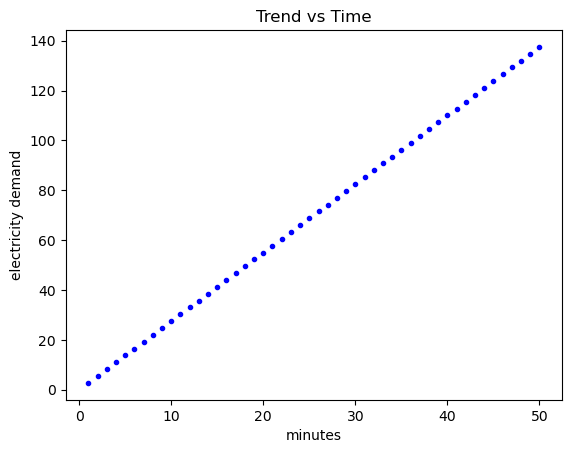

In [5]:
plt.plot(time, trend, 'b.')
plt.title("Trend vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

Great! Now let's generate a seasonal component.

In [6]:
seasonal = 10 + np.sin(time) * 10
seasonal,time

(array([1.84147098e+01, 1.90929743e+01, 1.14112001e+01, 2.43197505e+00,
        4.10757253e-01, 7.20584502e+00, 1.65698660e+01, 1.98935825e+01,
        1.41211849e+01, 4.55978889e+00, 9.79344930e-05, 4.63427082e+00,
        1.42016704e+01, 1.99060736e+01, 1.65028784e+01, 7.12096683e+00,
        3.86025081e-01, 2.49012753e+00, 1.14987721e+01, 1.91294525e+01,
        1.83665564e+01, 9.91148691e+00, 1.53779596e+00, 9.44216380e-01,
        8.67648250e+00, 1.76255845e+01, 1.95637593e+01, 1.27090579e+01,
        3.36366116e+00, 1.19683759e-01, 5.95962355e+00, 1.55142668e+01,
        1.99991186e+01, 1.52908269e+01, 5.71817331e+00, 8.22114656e-02,
        3.56461867e+00, 1.29636858e+01, 1.96379539e+01, 1.74511316e+01,
        8.41377331e+00, 8.34784521e-01, 1.68225257e+00, 1.01770193e+01,
        1.85090352e+01, 1.90178835e+01, 1.12357312e+01, 2.31745339e+00,
        4.62473472e-01, 7.37625146e+00]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20

Naturally, we'll want to plot our seasonality.

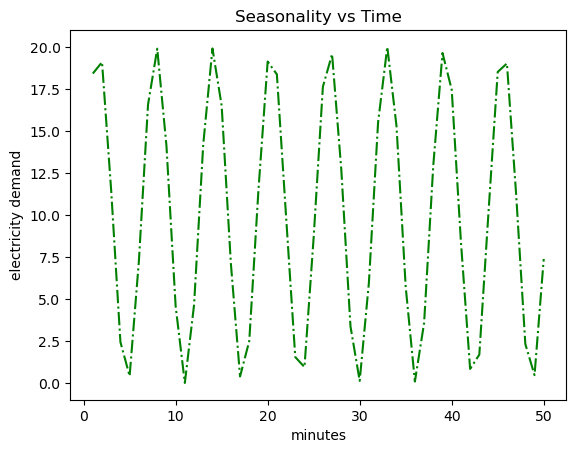

In [7]:
plt.plot(time, seasonal, 'g-.')
plt.title("Seasonality vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

And now to construct the residual component.

In [8]:
np.random.seed(10)  # reproducible results
residual = np.random.normal(loc=0.0, scale=1, size=len(time))
residual

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
       -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026])

A quick plot of residuals...

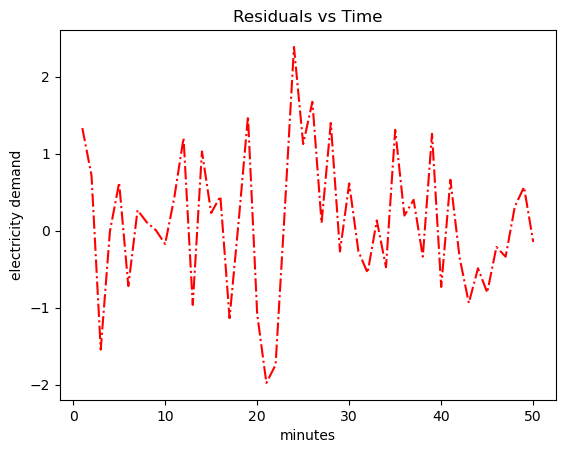

In [9]:
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

plt.show()

Quick recap: We created data for the fictional demand of electricity as measured by a fictional sensor. We did this by creating the three necessary components of time series data, which include trend, seasonality, and residuals. 

Next step: Aggregate the three components to create time series data. We'll do this for two different types of models: additive and multiplicative.

---
# Section 2: Aggregate Trend, Seasonality, and Residual Components

### Additive Time Series
Remember the equation for additive time series is simply: $O_{t} = T_{t} + S_{t} + R_{t}$ 

$O_{t}$ is the output   
$T_{t}$ is the trend  
$S_{t}$ is the seasonality  
$R_{t}$ is the residual  
$_t$ is a variable representing a particular point in time 

In [10]:
additive = trend + seasonal + residual

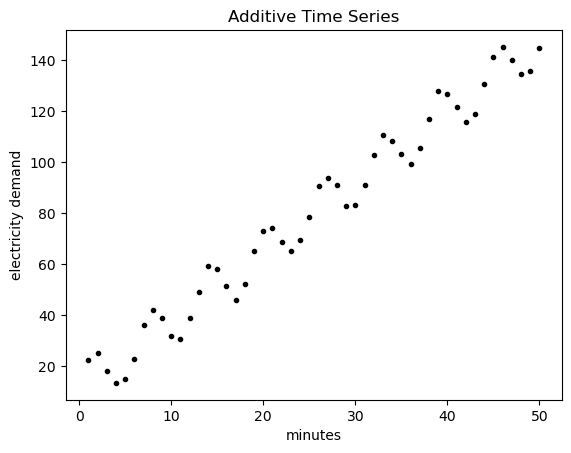

In [11]:
plt.plot(time, additive, 'k.')
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

We clearly see trend and seasonality in the plot above, as expected.

Now let's build a multiplicative time series dataset. 

### Multiplicative Time Series

Remember the equation for multiplicative time series is simply: $O_{t} = T_{t} * S_{t} * R_{t}$ 

In [12]:
# ignoring residual to make pattern more apparent
ignored_residual = np.ones_like(residual)
multiplicative = trend * seasonal * ignored_residual

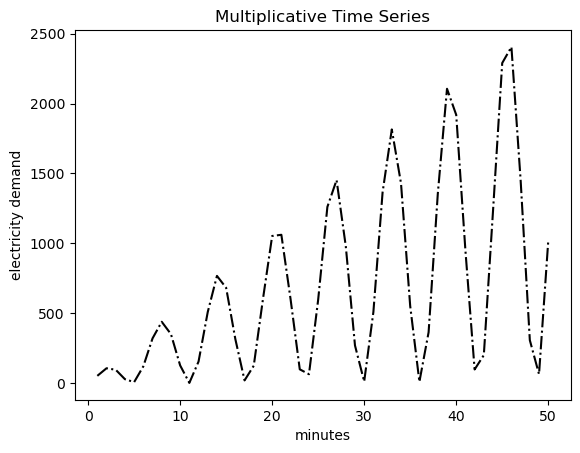

In [13]:
plt.plot(time, multiplicative, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

In [14]:
trend

array([  2.75,   5.5 ,   8.25,  11.  ,  13.75,  16.5 ,  19.25,  22.  ,
        24.75,  27.5 ,  30.25,  33.  ,  35.75,  38.5 ,  41.25,  44.  ,
        46.75,  49.5 ,  52.25,  55.  ,  57.75,  60.5 ,  63.25,  66.  ,
        68.75,  71.5 ,  74.25,  77.  ,  79.75,  82.5 ,  85.25,  88.  ,
        90.75,  93.5 ,  96.25,  99.  , 101.75, 104.5 , 107.25, 110.  ,
       112.75, 115.5 , 118.25, 121.  , 123.75, 126.5 , 129.25, 132.  ,
       134.75, 137.5 ])

In [15]:
log_trend = np.log(trend)
log_trend

array([1.01160091, 1.70474809, 2.1102132 , 2.39789527, 2.62103882,
       2.80336038, 2.95751106, 3.09104245, 3.20882549, 3.314186  ,
       3.40949618, 3.49650756, 3.57655027, 3.65065824, 3.71965111,
       3.78418963, 3.84481426, 3.90197267, 3.95603989, 4.00733319,
       4.05612335, 4.10264337, 4.14709513, 4.18965474, 4.23047674,
       4.26969745, 4.30743778, 4.34380542, 4.37889674, 4.41279829,
       4.44558812, 4.47733681, 4.50810847, 4.53796144, 4.56694897,
       4.59511985, 4.62251882, 4.64918707, 4.67516256, 4.70048037,
       4.72517298, 4.74927053, 4.77280103, 4.79579055, 4.8182634 ,
       4.84024231, 4.86174851, 4.88280192, 4.90342121, 4.92362392])

In [16]:
seasonal

array([1.84147098e+01, 1.90929743e+01, 1.14112001e+01, 2.43197505e+00,
       4.10757253e-01, 7.20584502e+00, 1.65698660e+01, 1.98935825e+01,
       1.41211849e+01, 4.55978889e+00, 9.79344930e-05, 4.63427082e+00,
       1.42016704e+01, 1.99060736e+01, 1.65028784e+01, 7.12096683e+00,
       3.86025081e-01, 2.49012753e+00, 1.14987721e+01, 1.91294525e+01,
       1.83665564e+01, 9.91148691e+00, 1.53779596e+00, 9.44216380e-01,
       8.67648250e+00, 1.76255845e+01, 1.95637593e+01, 1.27090579e+01,
       3.36366116e+00, 1.19683759e-01, 5.95962355e+00, 1.55142668e+01,
       1.99991186e+01, 1.52908269e+01, 5.71817331e+00, 8.22114656e-02,
       3.56461867e+00, 1.29636858e+01, 1.96379539e+01, 1.74511316e+01,
       8.41377331e+00, 8.34784521e-01, 1.68225257e+00, 1.01770193e+01,
       1.85090352e+01, 1.90178835e+01, 1.12357312e+01, 2.31745339e+00,
       4.62473472e-01, 7.37625146e+00])

In [17]:
log_seasonal = np.log(seasonal)
log_seasonal

array([ 2.91314979,  2.94932043,  2.43459534,  0.8887037 , -0.88975286,
        1.9748925 ,  2.80758574,  2.99039719,  2.64767614,  1.51727633,
       -9.23121174,  1.53347887,  2.65335959,  2.99102489,  2.80353481,
        1.96304351, -0.95185293,  0.91233393,  2.44224026,  2.95122916,
        2.91053142,  2.29369438,  0.4303502 , -0.05739992,  2.1606162 ,
        2.86935151,  2.97367884,  2.54231496,  1.21303001, -2.12290236,
        1.78500732,  2.74176004,  2.9956882 ,  2.7272531 ,  1.7436494 ,
       -2.4984605 ,  1.27105708,  2.56215205,  2.97746412,  2.85940449,
        2.12987004, -0.18058165,  0.52013371,  2.32013216,  2.918259  ,
        2.94537977,  2.41909899,  0.8404689 , -0.77116608,  1.99826558])

In [18]:
multiplicative

array([5.06404521e+01, 1.05011358e+02, 9.41424007e+01, 2.67517255e+01,
       5.64791223e+00, 1.18896443e+02, 3.18969920e+02, 4.37658814e+02,
       3.49499325e+02, 1.25394195e+02, 2.96251841e-03, 1.52930937e+02,
       5.07709716e+02, 7.66383832e+02, 6.80743734e+02, 3.13322541e+02,
       1.80466725e+01, 1.23261313e+02, 6.00810842e+02, 1.05211989e+03,
       1.06066863e+03, 5.99644958e+02, 9.72655944e+01, 6.23182811e+01,
       5.96508172e+02, 1.26022929e+03, 1.45260913e+03, 9.78597457e+02,
       2.68251977e+02, 9.87391012e+00, 5.08057907e+02, 1.36525548e+03,
       1.81492001e+03, 1.42969231e+03, 5.50374181e+02, 8.13893509e+00,
       3.62699949e+02, 1.35470516e+03, 2.10617055e+03, 1.91962448e+03,
       9.48652941e+02, 9.64176122e+01, 1.98926367e+02, 1.23141933e+03,
       2.29049311e+03, 2.40576226e+03, 1.45221826e+03, 3.05903847e+02,
       6.23183004e+01, 1.01423458e+03])

In [19]:
log_multiplicative = np.log(multiplicative)
log_multiplicative

array([ 3.92475071,  4.65406852,  4.54480854,  3.28659898,  1.73128596,
        4.77825289,  5.7650968 ,  6.08143964,  5.85650163,  4.83146233,
       -5.82171556,  5.02998643,  6.22990986,  6.64168313,  6.52318593,
        5.74723314,  2.89296132,  4.8143066 ,  6.39828015,  6.95856235,
        6.96665477,  6.39633774,  4.57744532,  4.13225482,  6.39109294,
        7.13904896,  7.28111662,  6.88612038,  5.59192675,  2.28989594,
        6.23059543,  7.21909685,  7.50379668,  7.26521453,  6.31059838,
        2.09665935,  5.89357591,  7.21133912,  7.65262667,  7.55988486,
        6.85504302,  4.56868888,  5.29293474,  7.11592271,  7.73652241,
        7.78562208,  7.2808475 ,  5.72327083,  4.13225513,  6.92188949])

In [20]:
new_additive = log_trend + log_seasonal
new_additive

array([ 3.92475071,  4.65406852,  4.54480854,  3.28659898,  1.73128596,
        4.77825289,  5.7650968 ,  6.08143964,  5.85650163,  4.83146233,
       -5.82171556,  5.02998643,  6.22990986,  6.64168313,  6.52318593,
        5.74723314,  2.89296132,  4.8143066 ,  6.39828015,  6.95856235,
        6.96665477,  6.39633774,  4.57744532,  4.13225482,  6.39109294,
        7.13904896,  7.28111662,  6.88612038,  5.59192675,  2.28989594,
        6.23059543,  7.21909685,  7.50379668,  7.26521453,  6.31059838,
        2.09665935,  5.89357591,  7.21133912,  7.65262667,  7.55988486,
        6.85504302,  4.56868888,  5.29293474,  7.11592271,  7.73652241,
        7.78562208,  7.2808475 ,  5.72327083,  4.13225513,  6.92188949])

### Exercise #1
In this exercise, your task is two-fold:
1. Determine if **Dataset_A** and **Dataset_B** are additive or multiplicative time series.
2. Determine the frequency of the seasonal component.

#### Set Path / Load Datasets

In [21]:
# get data
path_to_file = "../Data/"

time = np.arange(0, 50)
dataset_A = np.load("dataset_A.npy")
dataset_B = np.load("dataset_B.npy")
dataset_A
dataset_B

array([-0.14235884,  6.3304653 ,  2.3912557 ,  6.63127323, 10.31877377,
        8.57091636, 11.41374819, 17.30216504, 15.1671725 , 13.75469429,
       22.11531369, 20.06009099, 16.14603199, 15.05270755, 15.55073449,
       15.19071146, 17.35933554, 13.47033593, 10.1570024 ,  9.09097778,
        7.90833097, 10.29205167,  9.61760004,  8.45494058,  4.92797497,
        2.14071835,  1.29152766,  3.30767672,  4.39457134,  4.02963024,
        3.69942387,  3.40550313,  4.31530435,  5.69328312,  9.12517992,
       10.46363023,  6.93565553,  8.25611642, 11.9107138 , 17.33784104,
       16.98052611, 14.06772147, 17.8860098 , 21.1607553 , 21.89970493,
       22.53060364, 20.92007315, 24.17247378, 30.47716538, 27.70258919])

#### Plot Dataset_A

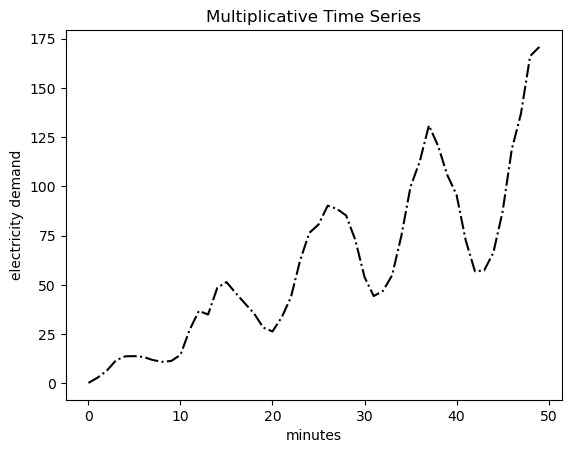

In [22]:
# insert code here
plt.plot(time, dataset_A, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

#### Additive or Multiplicative?

*(Your answer goes here.)*

I would say that it is additive because of the shape.

#### Frequency of Seasonal Component?

*(Your answer goes here.)*
It is seasonal.

#### Plot Dataset_B

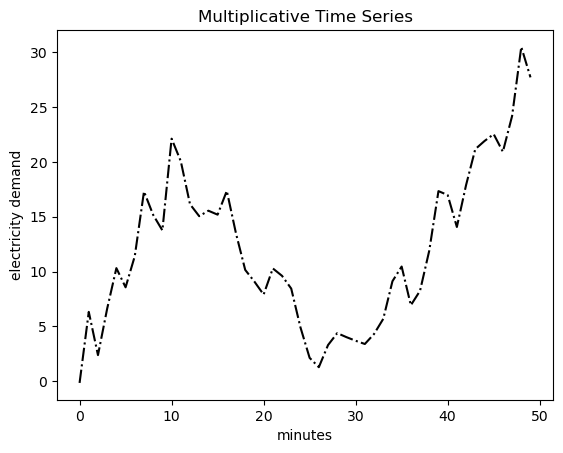

In [23]:
# insert code here
plt.plot(time, dataset_B, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

### Additive Decomposition

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=additive, model='additive', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

### Additive Plots

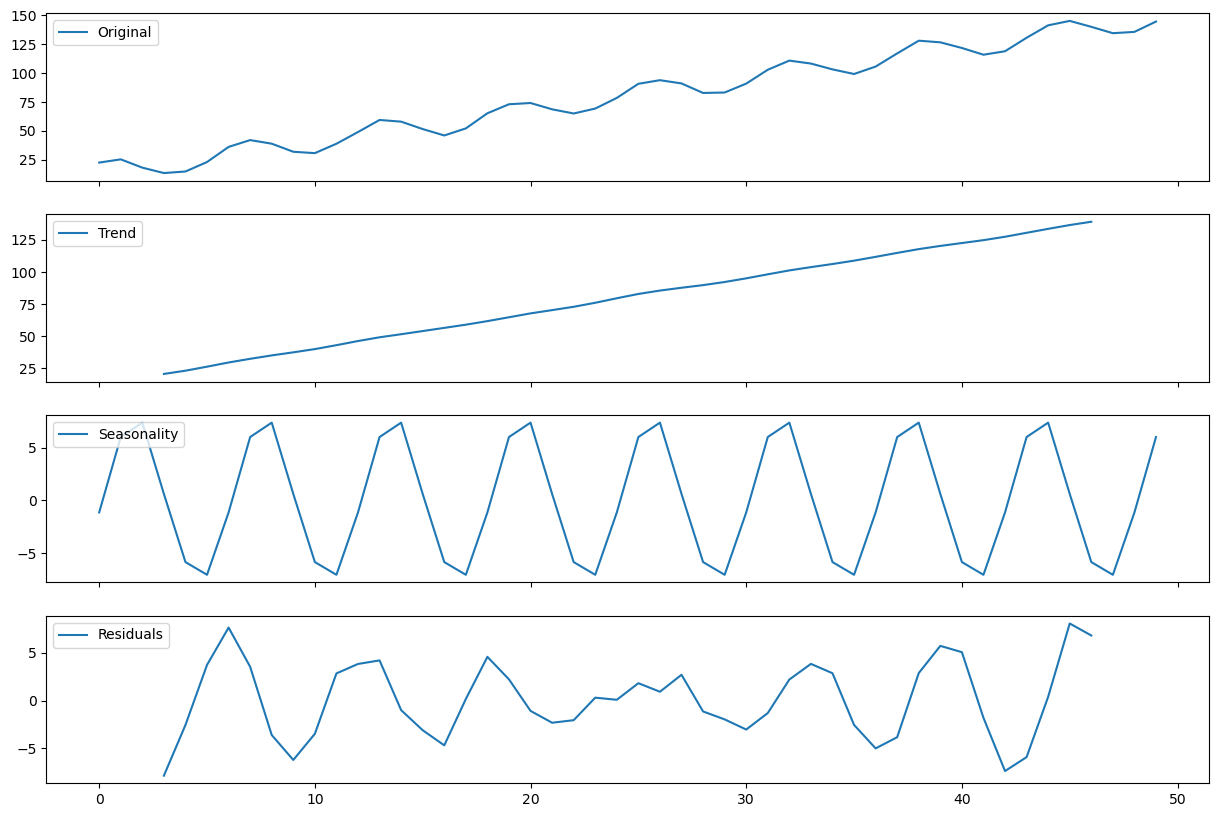

In [25]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

### Multiplicative Decomposition

In [26]:
ss_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

### Multiplicative Plots

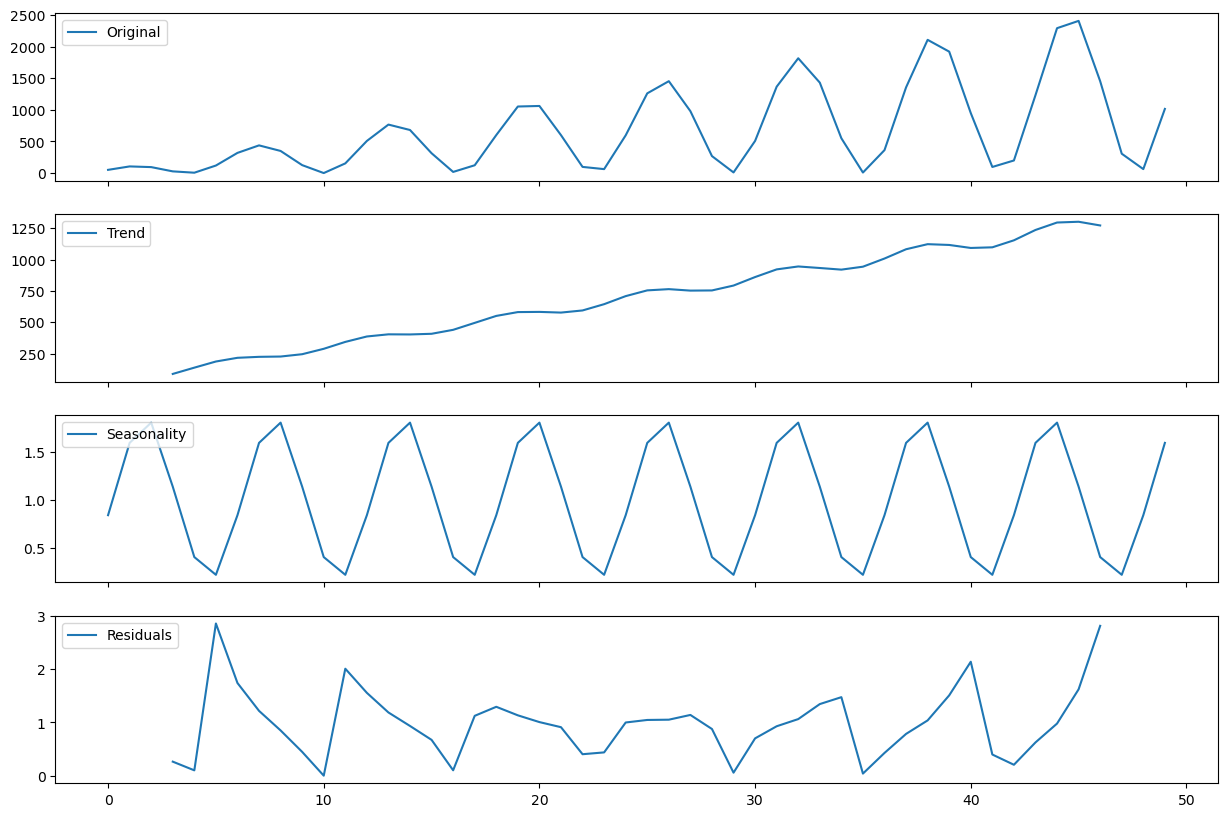

In [27]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(multiplicative, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

#### Decomposition Models

In [28]:
#from statsmodels.tsa.seasonal import seasonal_decompose

# insert code here
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=dataset_A, model='multiplicative', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

#### Dataset_A Plot

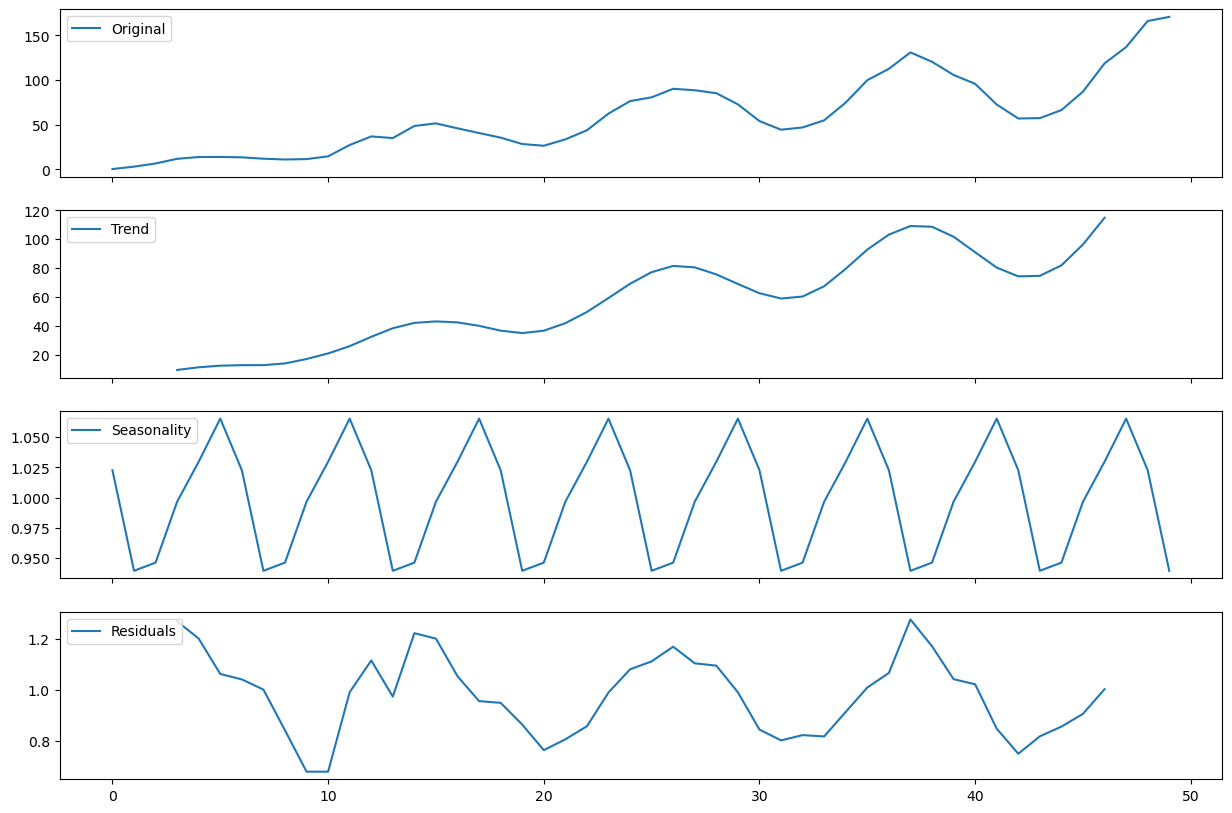

In [29]:
# insert code here
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataset_A, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

#### Dataset_B Plot

In [31]:
#from statsmodels.tsa.seasonal import seasonal_decompose

# insert code here
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=dataset_B, model='additive', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

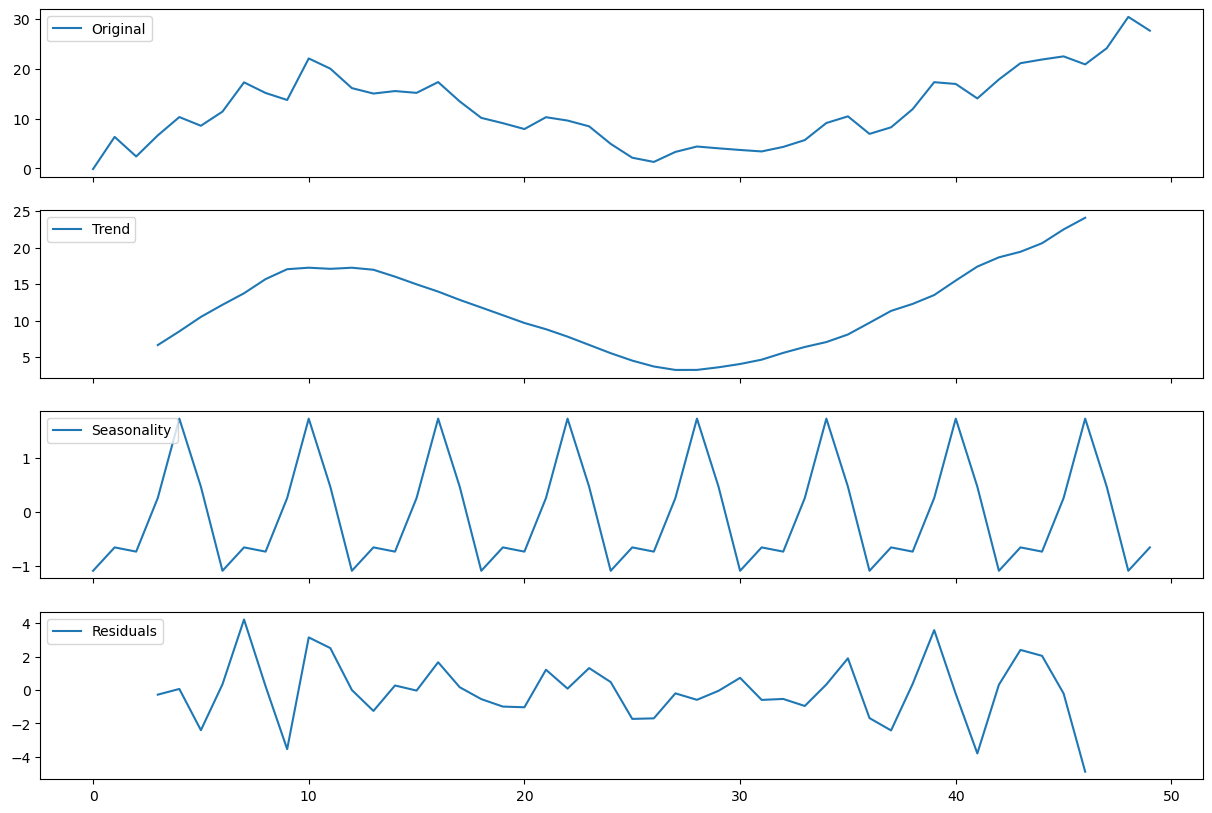

In [32]:
# insert code here
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataset_B, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');